使用无监督算法减去了人工标准样本的工作量。

K-means聚类，是先假设有K个中心点，经过若干次迭代，与这K个聚类中心相关的点就会被聚集到其周围，这也就是K-means的本质。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
n_samples = 1500
random_state = 170
X,y = make_blobs(n_samples=n_samples, random_state=random_state)

In [3]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

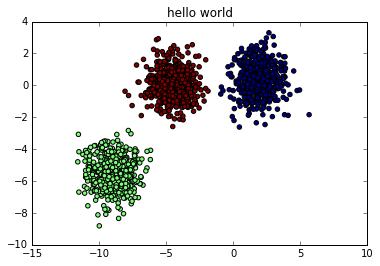

In [4]:
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("hello world")
plt.show()

In [5]:
def load_and_get_features1(filename, white=True, black=False):
    dga = pd.read_csv(filename, header=None)
    if white:
        features_white = dga[1].str.replace('.', ' ').tolist()
        return features_white
    if black:
        features_black = dga[0].str.replace('.', ' ').tolist()
        return features_black
    
def load_and_get_features2(filename, white=True, black=False):
    dga = pd.read_csv(filename, header=None)
    if white:
        features_white = dga[1].str.split('.').str.join('').str.join(' ').tolist()
        return features_white
    if black:
        features_black = dga[0].str.split('.').str.join('').str.join(' ').tolist()
        return features_black

In [6]:
features1_white = load_and_get_features1('./数据集/DGA/top-1000.csv', white=True)
features1_black1 = load_and_get_features1('./数据集/DGA/dga-cryptolocke-1000.txt', white=False, black=True)
features1_black2 = load_and_get_features1('./数据集/DGA/dga-post-tovar-goz-1000.txt', white=False, black=True)

In [7]:
features2_white = load_and_get_features2('./数据集/DGA/top-1000.csv', white=True)
features2_black1 = load_and_get_features2('./数据集/DGA/dga-cryptolocke-1000.txt', white=False, black=True)
features2_black2 = load_and_get_features2('./数据集/DGA/dga-post-tovar-goz-1000.txt', white=False, black=True)

In [8]:
features1 = np.concatenate((features1_white, features1_black1, features1_black2))
features2 = np.concatenate((features2_white, features2_black1, features2_black2))
label_white = [0] * len(features1_white)
label_black1 = [1] * len(features1_black1)
label_black2 = [1] * len(features1_black2)
label = label_white + label_black1 + label_black2

In [9]:
tfidf1 = TfidfVectorizer(ngram_range=(1,2))
countvec1 = CountVectorizer(ngram_range=(1,2))
X_tfidf1 = tfidf1.fit_transform(features1).toarray()
X_countvec1 = countvec1.fit_transform(features1).toarray()

tfidf2 = TfidfVectorizer(ngram_range=(2,2), token_pattern='\w')
countvec2 = CountVectorizer(ngram_range=(2,2), token_pattern='\w+')
X_tfidf2 = tfidf2.fit_transform(features2).toarray()
X_countvec2 = countvec2.fit_transform(features2).toarray()
y = label

X_train_tfidf1, X_test_tfidf1, y_train, y_test = train_test_split(X_tfidf1, y)
X_train_countvec1, X_test_countvec1 = train_test_split(X_countvec1)
X_train_tfidf2, X_test_tfidf2 = train_test_split(X_tfidf2)
X_train_countvec2, X_test_countvec2 = train_test_split(X_countvec2)

In [10]:
y_pred_tfidf1 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_train_tfidf1)
y_pred_countvec1 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_train_countvec1)
y_pred_tfidf2 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_train_tfidf2)
y_train_countvec2 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_train_countvec2)

In [11]:
y_pred_errors = np.array(y_train).astype('int32')[y_pred_tfidf2 != np.array(y_train).astype('int32')]

In [12]:
len(y_pred_errors), len(y_pred_tfidf2)

(1264, 2250)

In [13]:
tsne = TSNE(learning_rate=100)
x_train_tfidf2 = tsne.fit_transform(X_train_tfidf2)

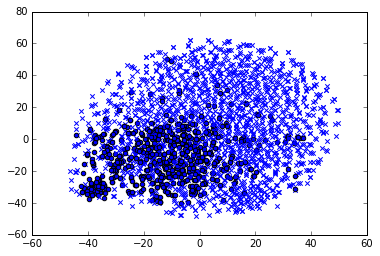

In [14]:
for i in range(len(x_train_tfidf2)):
    if y_pred_tfidf2[i] == 1:
        plt.scatter(x_train_tfidf2[i][0], x_train_tfidf2[i][1], marker='o')
    else:
        plt.scatter(x_train_tfidf2[i][0], x_train_tfidf2[i][1], marker='x')  

DBSCAN不需要实现设定聚类数，而是能够自动识别合适的簇数，并能够识别出噪声点。

In [15]:
from sklearn.cluster import DBSCAN

In [17]:
dbs = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

其中，主要参数为：
* eps，同一聚类集合中两个样本的最大距离。
* min_samples，同一聚类集合中最小样本数。
* algorithm，算法，分为‘auto’‘ball_tree’‘kd_tree’‘brute’。
* leaf_size，使用BallTree或者cKDTree算法时叶子节点个数。
* n_jobs，并发任务数。

In [21]:
import numpy as np
from sklearn.cluster import DBSCAN
#from sklearn.metrics import 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

In [22]:
X = StandardScaler().fit_transform(X)

In [27]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

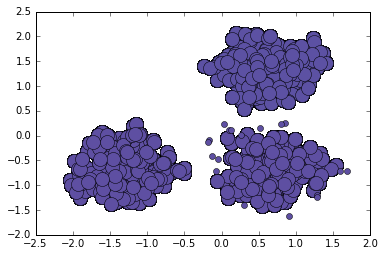

In [29]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))
for k, col in zip(labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.show()